In [227]:

import pandas as pd


google_df = pd.read_excel("GooglePlaystore.xlsx")
google_df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [228]:
#PREPROCESSING 1
#[3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

google_index = google_df[google_df["Reviews"] == "3.0M"].index
google_df = google_df.drop(google_index)



In [229]:

#TESTING/EXECUTING for preprocessing 1

google_df[google_df["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [230]:
#PREPROCESSING 2
#Remove rows where any of the columns has the value "Varies with device".

google_df = google_df[~google_df.isin(["Varies with device"]).any(axis=1)]
#TESTING/EXECUTING
google_df



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


In [231]:
import re

# PREPROCESSING 3
#[5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".
#If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".
def clean_android_version(val):
    if pd.isna(val):
        return None
    val = str(val)
    
    # REGEX look up regex again
    val = val.split('-')[0].strip()
    
    val = re.sub(r'[^0-9\.]', '', val)
    
    parts = val.split('.')
    if len(parts) >= 2:
        return f"{parts[0]}.{parts[1]}"
    elif len(parts) == 1:
        return parts[0]
    else:
        return None

google_df["Android Ver"] = google_df["Android Ver"].apply(clean_android_version)
#TESTING/EXECUTING
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [232]:
#PREPROCESSING 4
# Clean installs column: remove commas and '+'; keep valid integers only
def clean_installs(val):
    if pd.isna(val):
        return None
    val = str(val).replace(",", "").replace("+", "")
    return val if val.isdigit() else None

google_df["Installs"] = google_df["Installs"].apply(clean_installs)


google_df = google_df[google_df["Installs"].notna()]
google_df["Installs"] = google_df["Installs"].astype(int)
#TESTING/EXECUTING
google_df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [233]:
#PREPROCESSING 5
# For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row

missing_ratings = google_df['Rating'].isna()

remove_condition = (google_df['Reviews'].astype(float) < 100) & (google_df['Installs'] < 50000)

rows_to_remove = missing_ratings & remove_condition

google_df = google_df[~rows_to_remove]
#ROUND
category_avg_rating = google_df.groupby('Category')['Rating'].mean().round(2)

for category in google_df['Category'].unique():
    category_mask = (google_df['Category'] == category) & (google_df['Rating'].isna())
    google_df.loc[category_mask, 'Rating'] = category_avg_rating[category]

#TESTING/EXECUTING
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [234]:

#PREPROCESSING 6
# Convert Size values to integers (M to millions, K to thousands)

def convert_size_to_int(size):
    
    size = str(size).strip()
    
    if 'M' in size:
        try:
            return int(float(size.replace('M', '')) * 1000000)
        except ValueError:
            return None
    
    elif 'k' in size:
        try:
            return int(float(size.replace('k', '')) * 1000)
        except ValueError:
            return None
    
    elif size.isdigit():
        return int(size)
    
    return None




google_df = google_df.copy()

google_df.loc[:, 'Size'] = google_df['Size'].apply(convert_size_to_int)

#TESTING/EXECUTING
google_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582000,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [235]:
#ANALYSIS 1
# Describe category-wise rating statistics
# Group by Category and then use describe() on the Rating column

google_df['Rating'] = pd.to_numeric(google_df['Rating'], errors='coerce')

category_rating_stats = google_df.groupby('Category')['Rating'].describe()


#TESTING/EXECUTING
print("Category-wise Rating Statistics:")
category_rating_stats

Category-wise Rating Statistics:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


In [236]:
#ANALYSIS 2(a,b,c)
# Extract all "Free" apps
free_apps = google_df[google_df['Type'] == 'Free'].copy()

def get_top3_by_category(df, column):
    sorted_df = df.sort_values(by=[column], ascending=False)
    
    top3 = sorted_df.groupby('Category').head(3)
    
    result = top3[['Category', 'App', column]]
    
    
    return result
#TESTING/EXECUTING|
# a. 
top3_rating = get_top3_by_category(free_apps, 'Rating')
print("Top 3 Apps by Rating for each Category:")
print(top3_rating.head(3))

# b.
top3_installs = get_top3_by_category(free_apps, 'Installs')
print("\nTop 3 Apps by Installs for each Category:")
print(top3_installs.head(3))

# c. 
top3_reviews = get_top3_by_category(free_apps, 'Reviews')
print("\nTop 3 Apps by Reviews for each Category:")
print(top3_reviews.head(3))

Top 3 Apps by Rating for each Category:
        Category                                App  Rating
10837     FAMILY   Fr. Mike Schmitz Audio Teachings     5.0
8104   LIFESTYLE           Cy-Fair Christian Church     5.0
8275      FAMILY  DC N COMPANY ENTERTAINMENT RADIO!     5.0

Top 3 Apps by Installs for each Category:
                Category             App    Installs
1872                GAME  Subway Surfers  1000000000
3736  NEWS_AND_MAGAZINES     Google News  1000000000
1917                GAME  Subway Surfers  1000000000

Top 3 Apps by Reviews for each Category:
     Category             App   Reviews
1879     GAME  Clash of Clans  44893888
1704     GAME  Clash of Clans  44891723
1670     GAME  Clash of Clans  44891723


In [237]:
#ANALYSIS 3
# Find the average, maximum and minimum price of the paid applications.
paid_apps = google_df[google_df['Type'] == 'Paid']

avg_price = paid_apps['Price'].mean()
max_price = paid_apps['Price'].max()
min_price = paid_apps['Price'].min()

#TESTING/EXECUTING
print(f"Paid Applications Price Statistics:")
print(f"Average Price: ${avg_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")

Paid Applications Price Statistics:
Average Price: $15.14
Maximum Price: $400.00
Minimum Price: $0.99


In [ ]:
# VISUALIZATION 1
# [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
#Count the number of applications per genre and display it using a pie chart.
import matplotlib.pyplot as plt

first_non_null = google_df['Genres'].dropna().iloc[0]
if isinstance(first_non_null, str):
    google_df['Genres'] = google_df['Genres'].str.split(';')

exploded_df = google_df.explode('Genres')

exploded_df['Genres'] = exploded_df['Genres'].apply(lambda x: x.strip() if isinstance(x, str) else x)

genre_counts = exploded_df['Genres'].value_counts() 

def format_count(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}"

plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct=lambda pct: format_count(pct, genre_counts), startangle=140)
plt.title("Distribution of Applications by Genre (Counts)")
plt.axis('equal')
plt.tight_layout()
#TESTING/EXECUTING
plt.show()

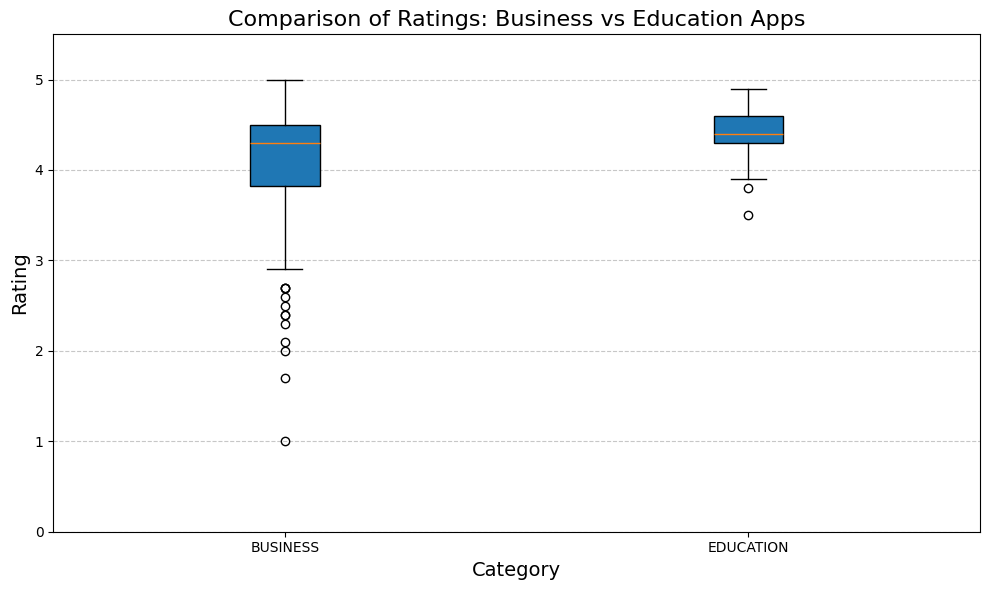

In [242]:
import matplotlib.pyplot as plt
#visualization 2 , boxplot
# Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.
business_ratings = google_df[google_df['Category'] == 'BUSINESS']['Rating'].dropna()
education_ratings = google_df[google_df['Category'] == 'EDUCATION']['Rating'].dropna()

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot([business_ratings, education_ratings], 
                      tick_labels=['BUSINESS', 'EDUCATION'],
                      patch_artist=True)

plt.title('Comparison of Ratings: Business vs Education Apps', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 5.5)

plt.tight_layout()
#TESTING/EXECUTING
plt.show()